## Download det_guidance (management guidance) via WRDS
- Link for det_guidance at WRDS: https://wrds-www.wharton.upenn.edu/pages/get-data/ibes-thomson-reuters/ibes-guidance/detail-history/detail/

-------------------------

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import wrds
pd.set_option('display.max_columns', None)

### Connect WRDS

In [2]:
conn=wrds.Connection()

Enter your WRDS username [yjaey]: yjaeyoon
Enter your password: ···············


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
Loading library list...
Done


---------------------------

### Check det_guidance

In [3]:
conn.describe_table(library='ibes', table='det_guidance')

Approximately 1580746 rows in ibes.det_guidance.


,name,nullable,type
0,ticker,True,VARCHAR
1,pdicity,True,VARCHAR
2,measure,True,VARCHAR
3,curr,True,VARCHAR
4,units,True,VARCHAR
5,range_desc,True,VARCHAR
6,diff_code,True,VARCHAR
7,act_std,True,VARCHAR
8,action,True,VARCHAR
9,guidance_code,True,VARCHAR


In [4]:
sample= conn.get_table(library='ibes', table='det_guidance', obs=5)
sample.head(2)

,ticker,pdicity,measure,curr,units,range_desc,diff_code,act_std,action,guidance_code,actdats,anndats,mod_date,acttims,anntims,mod_time,prd_yr,prd_mon,eefymo,val_1,val_2,mean_at_date,usfirm
0,000R,ANN,EBT,USD,millions,01,01,01,I,02,2014-05-02,2014-05-01,2014-05-02,17177.0,21600.0,17247.0,2014.0,12.0,12.0,-23.0,-20.0,-24.852,1.0
1,000R,QTR,EBT,USD,millions,01,01,01,I,03,2014-05-02,2014-05-01,2014-05-02,17225.0,21600.0,17247.0,2014.0,6.0,12.0,-7.0,-6.0,-6.589,1.0


------------

### Download

In [5]:
df= conn.raw_sql(f"""select *
                    from ibes.det_guidance a
                    where   usfirm=1 and
                            curr='USD' and
                            measure in ('SAL', 'CPX', 'EPS') and
                            pdicity in ('ANN', 'QTR')
                    """)
df=df.drop(columns=['usfirm', 'curr'])
print(df.shape)
df.head(2)

(436122, 21)


,ticker,pdicity,measure,units,range_desc,diff_code,act_std,action,guidance_code,actdats,anndats,mod_date,acttims,anntims,mod_time,prd_yr,prd_mon,eefymo,val_1,val_2,mean_at_date
0,001J,QTR,CPX,millions,02,01,01,I,02,2017-09-18,2017-07-26,2017-09-18,61346.0,59400.0,61350.0,2017.0,9.0,12.0,20.0,NaN,15.5
1,001J,QTR,CPX,millions,02,01,01,I,02,2017-10-30,2017-10-25,2017-10-30,48648.0,59400.0,48711.0,2017.0,12.0,12.0,20.0,NaN,18.0


----------

### Inspect some variables

In [6]:
pd.crosstab(df.measure, df.units)

units,P/S,millions
measure,,
CPX,0,81068
EPS,189393,0
SAL,0,165661


=> EPS is the only one reported in a unit of P/S.

In [7]:
df.groupby('pdicity').size()

pdicity
ANN    275447
QTR    160675
dtype: int64

In [8]:
# units of guidance values 
df.groupby('units').size()

units
P/S         189393
millions    246729
dtype: int64

In [9]:
# guidance Range
df.groupby('range_desc').size()

range_desc
01    314870
02    100700
03      5763
04      3238
06      1077
08       848
10      3928
11       516
12       535
13       307
14      2596
15       161
16       122
17       381
18      1078
NA         2
dtype: int64

In [10]:
# difference reason (e.g. asset writedown)
df.groupby('diff_code').size()

diff_code
01    360576
02         3
30         1
57     36015
58     39526
NA         1
dtype: int64

In [11]:
# accounting standards
# https://wrds-www.wharton.upenn.edu/documents/513/IBES_Guidance_Miscellaneous_Code_Definitions.pdf
df.groupby('act_std').size()

act_std
01    427654
02       530
03      7827
04         1
05       107
08         2
NA         1
dtype: int64

In [12]:
# Guidance relative to consensus (e.g. beat, match)
df.groupby('guidance_code').size()

guidance_code
01     89669
02     79449
03    169034
06     97922
dtype: int64

-------------

### Selection: anndats between 2004 and 2021

In [13]:
df['ann_y']= pd.to_datetime(df['anndats']).dt.year
beg_y= 2004
end_y= 2021
df=df[df.ann_y >=beg_y]
df=df[df.ann_y <=end_y]
print(df.shape)
df.head(2)

(373126, 22)


,ticker,pdicity,measure,units,range_desc,diff_code,act_std,action,guidance_code,actdats,anndats,mod_date,acttims,anntims,mod_time,prd_yr,prd_mon,eefymo,val_1,val_2,mean_at_date,ann_y
0,001J,QTR,CPX,millions,02,01,01,I,02,2017-09-18,2017-07-26,2017-09-18,61346.0,59400.0,61350.0,2017.0,9.0,12.0,20.0,NaN,15.5,2017
1,001J,QTR,CPX,millions,02,01,01,I,02,2017-10-30,2017-10-25,2017-10-30,48648.0,59400.0,48711.0,2017.0,12.0,12.0,20.0,NaN,18.0,2017


In [14]:
vars_to_keep= ['ticker', 'pdicity', 'measure', 'act_std', 'anndats', 'prd_yr', 'prd_mon', 'eefymo', 'val_1', 'ann_y']
df=df[vars_to_keep]
df.head(2)

,ticker,pdicity,measure,act_std,anndats,prd_yr,prd_mon,eefymo,val_1,ann_y
0,001J,QTR,CPX,01,2017-07-26,2017.0,9.0,12.0,20.0,2017
1,001J,QTR,CPX,01,2017-10-25,2017.0,12.0,12.0,20.0,2017


-------------

### Inspection for act_std

In [15]:
pd.crosstab(df.ann_y, df.act_std)

act_std,01,02,03,05,08,NA
ann_y,,,,,,
2004,24906,0,0,0,0,0
2005,26780,0,0,0,0,0
2006,30895,0,0,0,0,0
2007,25879,0,0,0,0,0
2008,23379,0,0,0,0,0
2009,20371,0,0,0,0,0
2010,21580,0,0,0,0,0
2011,21894,0,0,0,0,0
2012,21824,0,0,0,0,0


<b>Note</b>
- Some firms with 03 (Local GAAP) from 2019, why?  
- Link for act_std values: https://wrds-www.wharton.upenn.edu/documents/513/IBES_Guidance_Miscellaneous_Code_Definitions.pdf

-----------

## Check data with visualization

In [16]:
df_ann= df[df.pdicity=='ANN']
df_qtr= df[df.pdicity=='QTR']
df.groupby('pdicity').size()

pdicity
ANN    245925
QTR    127201
dtype: int64

### Distribution of Annual forecasts

In [17]:
df_vis= df_ann

# Forecast-years
fcst_year_dist= df_vis.pivot_table(values='ticker', index='ann_y', columns='measure', aggfunc='count')

# Firm-years
firm_year_dist= df_vis.pivot_table(values='ticker', index='ann_y', columns='measure', aggfunc='nunique')

In [18]:
firm_year_dist.head(2)

measure,CPX,EPS,SAL
ann_y,,,
2004,567,1764,1409
2005,863,1594,1443


In [19]:
# Parameter set-ups
font='Times New Roman'
fontsize_title=25
fontsize_label=15
title_pad= 30 # space between title and figure
figsize=(10,5)
xticks=range(beg_y, end_y+1)

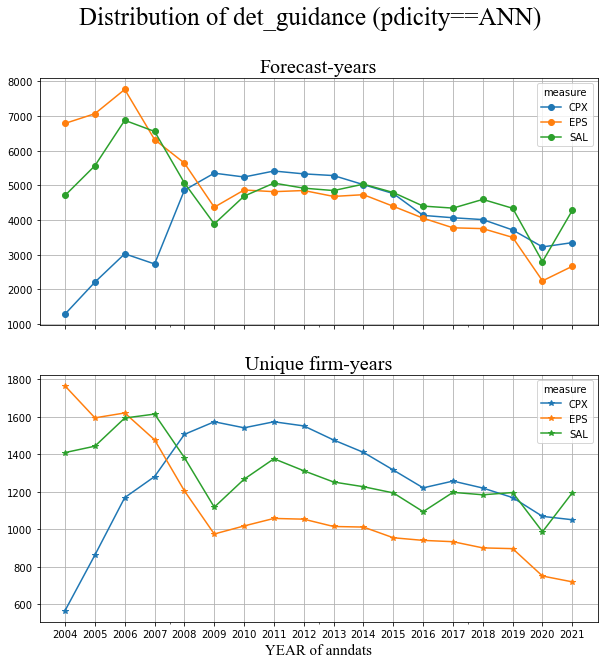

In [20]:
figure, axes= plt.subplots(2,1, sharex=True, figsize= (10,10))

figure.suptitle('Distribution of det_guidance (pdicity==ANN)', font= font, fontsize=fontsize_title)
fcst_year_dist.plot(grid=True, marker='o', ax=axes[0])
firm_year_dist.plot(grid=True, marker='*', ax=axes[1])
plt.xlabel("YEAR of anndats", font= font, fontsize=fontsize_label)
plt.xticks(xticks)
axes[0].set_title("Forecast-years", font= font, fontsize=fontsize_title-5)
axes[1].set_title("Unique firm-years", font= font, fontsize=fontsize_title-5)
plt.show()

### Distribution of Quarterly forecasts

In [21]:
df_vis= df_qtr

# Forecast-years
fcst_year_dist= df_vis.pivot_table(values='ticker', index='ann_y', columns='measure', aggfunc='count')

# Firm-years
firm_year_dist= df_vis.pivot_table(values='ticker', index='ann_y', columns='measure', aggfunc='nunique')

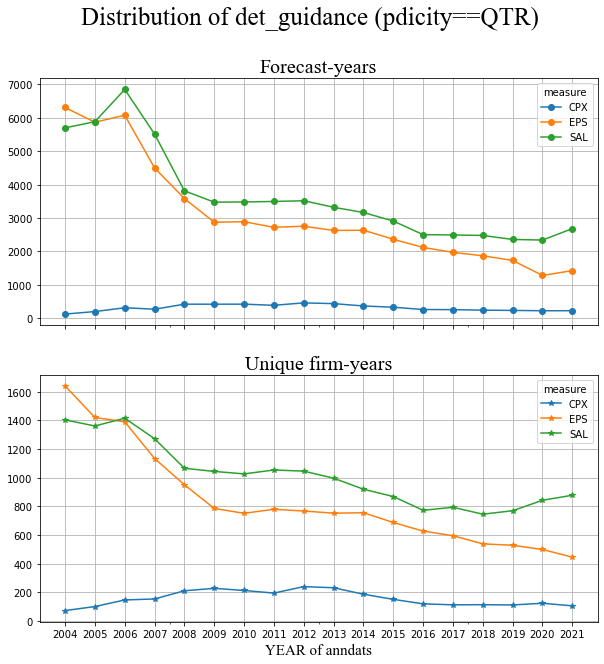

In [22]:
figure, axes= plt.subplots(2,1, sharex=True, figsize= (10,10))

figure.suptitle('Distribution of det_guidance (pdicity==QTR)', font= font, fontsize=fontsize_title)
fcst_year_dist.plot(grid=True, marker='o', ax=axes[0])
firm_year_dist.plot(grid=True, marker='*', ax=axes[1])
plt.xlabel("YEAR of anndats", font= font, fontsize=fontsize_label)
plt.xticks(xticks)
axes[0].set_title("Forecast-years", font= font, fontsize=fontsize_title-5)
axes[1].set_title("Unique firm-years", font= font, fontsize=fontsize_title-5)
plt.show()

----------

### Save to .csv

In [23]:
df.to_csv("work-in-progress/Capex/data/ibes_det_guidance.csv", index= None)

### Close connection

In [24]:
conn.close()

---------